___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE
df = pd.read_csv('../DATA/Frozen_Dessert_Production.csv',index_col= 'DATE',parse_dates=True)

In [3]:
df

IPN31152N
DATE                 
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636
...               ...
2019-05-01   114.5613
2019-06-01   124.9605
2019-07-01   110.2632
2019-08-01   102.6085
2019-09-01   101.5866

[573 rows x 1 columns]

**Task: Change the column name to Production**

In [4]:
#CODE HERE
df.columns = ['Production']
df.head()

Production
DATE                  
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636

**TASK: Plot out the time series**

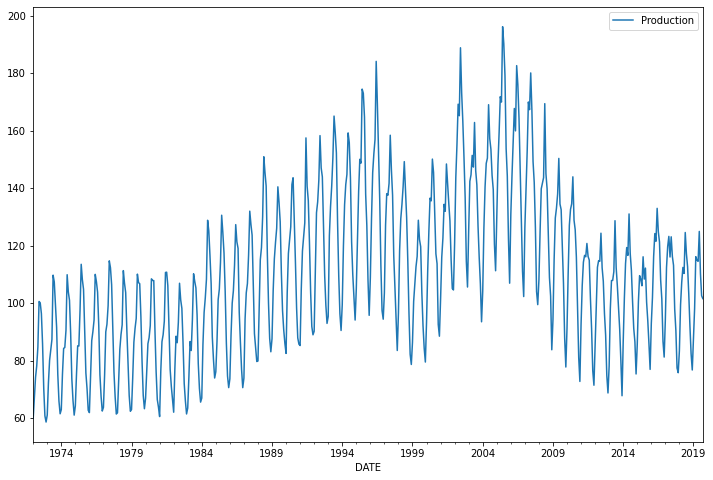

In [5]:
#CODE HERE
df.plot(figsize = (12,8))

## Train Test Split

**TASK: Figure out the length of the data set**

In [6]:
#CODE HERE
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [7]:
#CODE HERE
test_size = 24
test_ind = len(df) - test_size
test_ind

549

In [8]:
train = df.iloc[:test_ind]
train

Production
DATE                  
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
...                ...
2017-05-01    116.0635
2017-06-01    123.0870
2017-07-01    116.2639
2017-08-01    113.1717
2017-09-01     97.9125

[549 rows x 1 columns]

In [9]:
test = df.iloc[test_ind:]
test

Production
DATE                  
2017-10-01     90.4732
2017-11-01     77.4378
2017-12-01     75.8118
2018-01-01     83.4343
2018-02-01     99.4899
2018-03-01    107.3152
2018-04-01    112.4309
2018-05-01    110.3544
2018-06-01    124.5841
2018-07-01    117.2215
2018-08-01    112.6779
2018-09-01    103.3118
2018-10-01     92.1321
2018-11-01     82.4347
2018-12-01     76.7608
2019-01-01     86.9988
2019-02-01     98.1116
2019-03-01    116.1718
2019-04-01    114.9703
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    101.5866

In [10]:
len(test)

24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [11]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
scaled_train = scaler.transform(train)

In [15]:
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [16]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
length = 18
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [19]:
model = Sequential()

model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [21]:
# CODE HERE
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size = 1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [22]:
#CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [24]:
# CODE HERE
model.fit_generator(generator, epochs = 20, validation_data = validation_generator, callbacks = [early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 531 steps, validate for 6 steps
Epoch 1/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0249 - val_loss: 0.0035
Epoch 2/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0076 - val_loss: 0.0016
Epoch 3/20
531/531 [==============================] - 3s 6ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 4/20
531/531 [==============================] - 3s 6ms/step - loss: 0.0033 - val_loss: 0.0019


**TASK: Plot the history of the loss that occured during training.**

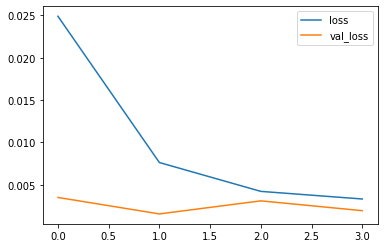

In [25]:
# CODE HERE
loss = pd.DataFrame(model.history.history)
loss.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [29]:
# CODE HERE
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [31]:
true_prediction = scaler.inverse_transform(test_predictions)

In [32]:
test['Predictions'] = true_prediction

C:\Users\gg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
test

Production  Predictions
DATE                               
2017-10-01     90.4732    87.879410
2017-11-01     77.4378    80.868327
2017-12-01     75.8118    81.984737
2018-01-01     83.4343    90.672787
2018-02-01     99.4899    98.444956
2018-03-01    107.3152   104.636473
2018-04-01    112.4309   109.366527
2018-05-01    110.3544   112.316030
2018-06-01    124.5841   111.406037
2018-07-01    117.2215   106.900026
2018-08-01    112.6779    98.712312
2018-09-01    103.3118    88.543976
2018-10-01     92.1321    78.637381
2018-11-01     82.4347    73.412080
2018-12-01     76.7608    74.894215
2019-01-01     86.9988    82.709171
2019-02-01     98.1116    90.325736
2019-03-01    116.1718    96.391942
2019-04-01    114.9703   100.774355
2019-05-01    114.5613   103.229451
2019-06-01    124.9605   102.005743
2019-07-01    110.2632    97.326015
2019-08-01    102.6085    89.599093
2019-09-01    101.5866    80.168285

**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

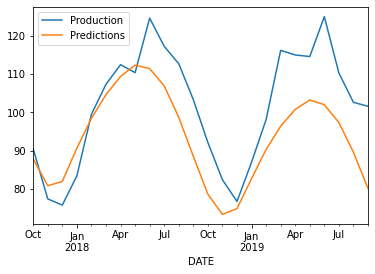

In [34]:
# CODE HERE
test.plot()

**TASK: Calculate your RMSE.**

In [35]:
#CODE HERE
from sklearn.metrics import mean_squared_error

In [38]:
np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

11.570980652141627